In [81]:
%matplotlib inline

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
import sklearn.datasets as dta
import scipy.stats as stats
import plotly.express as px

In [84]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/merge_file.csv')
# Read the csv file
combined_df = pd.read_csv(file_path)
# Display data
combined_df.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2013_rental,2014_rental,2015_rental,2016_rental,2017_rental,2018_rental,2019_rental,2020_rental,2021_rental,2022_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,1909.0,1957.0,1940.0,1903.0,1900.0,1967.0,2016.0,1990.0,2340.0,2420.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1022.0,1103.0,958.0,1016.0,1007.0,1042.0,1068.0,1054.0,1240.0,1282.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,953.0,1075.0,1045.0,1081.0,1083.0,1121.0,1149.0,1134.0,1334.0,1379.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1210.0,1222.0,1227.0,1260.0,1263.0,1307.0,1340.0,1323.0,1556.0,1609.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2132.0,2237.0,2345.0,2465.0,2469.0,2555.0,2619.0,2585.0,3040.0,3143.0


In [85]:
#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
combined_df_clean = combined_df.copy()  
combined_df_clean.loc[:, combined_df_clean.columns != object_column] = combined_df_clean.loc[:, 
                       combined_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')

#combined_df_clean = combined_df_clean.apply(pd.to_numeric, errors='coerce').astype('Int64')
combined_df_clean.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2013_rental,2014_rental,2015_rental,2016_rental,2017_rental,2018_rental,2019_rental,2020_rental,2021_rental,2022_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,1909.0,1957.0,1940.0,1903.0,1900.0,1967.0,2016.0,1990.0,2340.0,2420.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1022.0,1103.0,958.0,1016.0,1007.0,1042.0,1068.0,1054.0,1240.0,1282.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,953.0,1075.0,1045.0,1081.0,1083.0,1121.0,1149.0,1134.0,1334.0,1379.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1210.0,1222.0,1227.0,1260.0,1263.0,1307.0,1340.0,1323.0,1556.0,1609.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2132.0,2237.0,2345.0,2465.0,2469.0,2555.0,2619.0,2585.0,3040.0,3143.0


In [86]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/population_2012_2022.csv')
# Read the csv file
population_df = pd.read_csv(file_path)
#print df 
population_df.head()

,State,Population 2012,Population 2013,Population 2014,Population 2015,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,Population 2021,Population 2022
0,AK,730810,737626,737075,738430,742575,740983,736624,733603,733374,734923,733276
1,AL,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024294,5050380,5073903
2,AR,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3011490,3028443,3046404
3,AZ,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7157902,7272487,7365684
4,CA,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39538212,39145060,39040616


In [87]:
x_axis = np.arange(len(population_df))
value_for_year_1 = "2012"
value_for_year_2 = "2022"
year_value_1 = "Population " + value_for_year_1
year_value_2 = "Population " + value_for_year_2
 


In [88]:
column_number_1 = "Population " + value_for_year_1
column_number_2 = "Population " + value_for_year_2

# Get the top 10 values for both years
top_10_1 = population_df.nlargest(10, column_number_1)[['State', column_number_1]]
top_10_2 = population_df.nlargest(10, column_number_2)[['State', column_number_2]]


In [89]:
top_10_population_df_1 = pd.DataFrame({'State': top_10_1['State'].tolist(), column_number_1: top_10_1[column_number_1].tolist()})

top_10_population_df_1.head(10)

,State,Population 2012
0,CA,37944551
1,TX,26084120
2,NY,19574362
3,FL,19302016
4,IL,12883029
5,PA,12769123
6,OH,11550971
7,GA,9903580
8,MI,9898289
9,NC,9751810


In [90]:
top_10_population_df_2 = pd.DataFrame({'State': top_10_2['State'].tolist(), column_number_2: top_10_2[column_number_2].tolist()})

top_10_population_df_2.head(10)

,State,Population 2022
0,CA,39040616
1,TX,30029848
2,FL,22245521
3,NY,19673200
4,PA,12972091
5,IL,12582515
6,OH,11759697
7,GA,10913150
8,NC,10695965
9,MI,10033281


In [91]:
column_number_3 = value_for_year_1 + "_homelesess"
column_number_4 = value_for_year_2 + "_homelesess"
top_10_homelessness_3 = combined_df_clean.nlargest(10, column_number_3)[['State', column_number_3]]
top_10_homelessness_4 = combined_df_clean.nlargest(10, column_number_4)[['State', column_number_4]]

In [92]:
top_10_homelessness_df_1 = pd.DataFrame({'State': top_10_homelessness_3['State'].tolist(), column_number_3: top_10_homelessness_3[column_number_3].tolist()})

# Display the new DataFrame
top_10_homelessness_df_1.head(10)

,State,2012_homelesess
0,CA,120098.0
1,NY,69566.0
2,FL,55170.0
3,TX,34052.0
4,GA,20516.0
5,WA,20504.0
6,MA,17501.0
7,CO,16768.0
8,OR,15828.0
9,PA,14736.0


In [93]:
top_10_homelessness_df_2 = pd.DataFrame({'State': top_10_homelessness_4['State'].tolist(), column_number_4: top_10_homelessness_4[column_number_4].tolist()})

# Display the new DataFrame
top_10_homelessness_df_2.head(10)

,State,2022_homelesess
0,CA,171521
1,NY,74178
2,FL,25959
3,WA,25211
4,TX,24432
5,OR,17959
6,MA,15507
7,AZ,13553
8,PA,12691
9,GA,10689


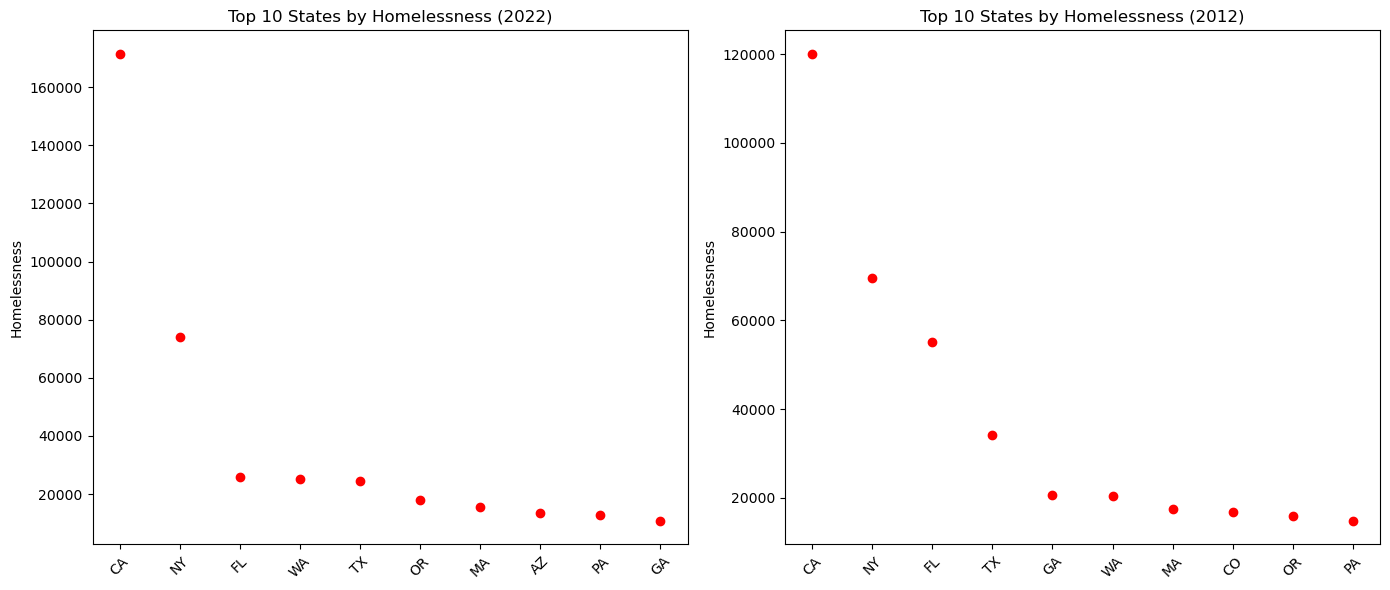

In [94]:
# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for population in the first subplot
ax1.scatter(top_10_homelessness_df_2['State'], top_10_homelessness_df_2[column_number_4], color='red', marker='o')
ax1.set_title(f'Top 10 States by Homelessness ({value_for_year_2})')
ax1.set_ylabel('Homelessness')

# Scatter plot for homelessness in the second subplot
ax2.scatter(top_10_homelessness_df_1['State'], top_10_homelessness_df_1[column_number_3], color='red', marker='o')
ax2.set_title(f'Top 10 States by Homelessness ({value_for_year_1})')
ax2.set_ylabel('Homelessness')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as an image
plt.savefig('../Outputs/top_ten_states_by_homelessness_2022_2012.jpg')

# Show the plot
plt.show()

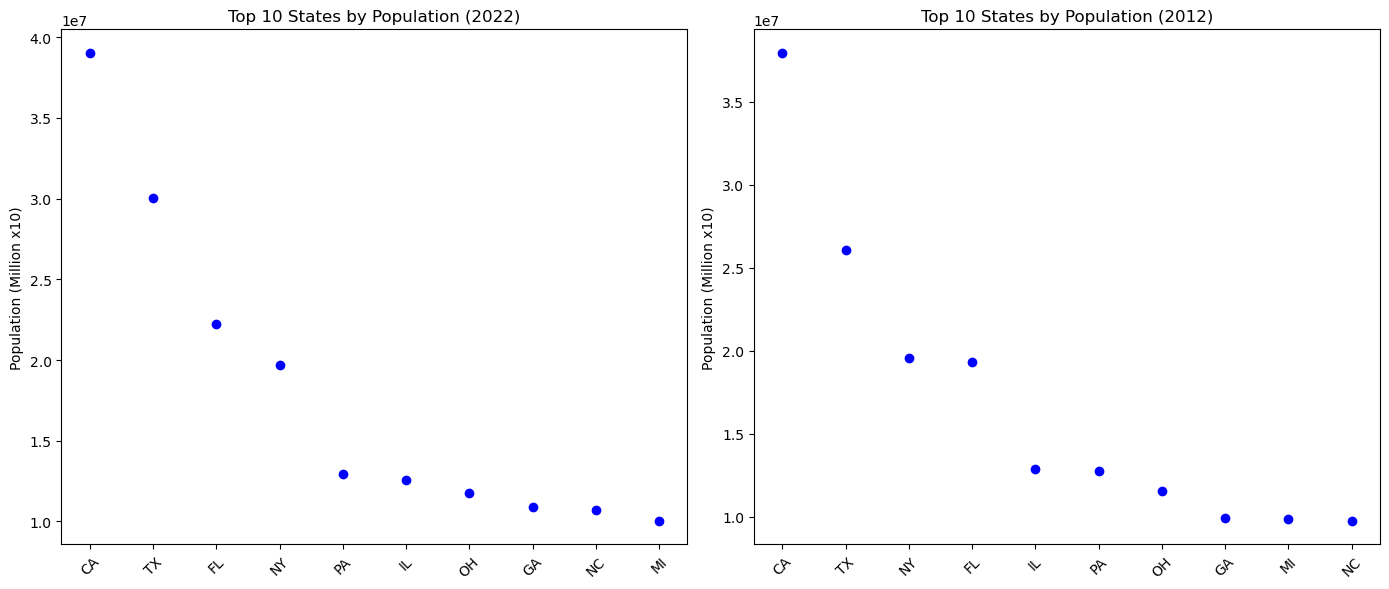

In [95]:
# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for population in the first subplot (year 2)
ax1.scatter(top_10_population_df_2['State'], top_10_population_df_2[column_number_2], color='blue', marker='o')
ax1.set_title(f'Top 10 States by Population ({value_for_year_2})')
ax1.set_ylabel('Population (Million x10)')

# Scatter plot for population in the second subplot (year 1)
ax2.scatter(top_10_population_df_1['State'], top_10_population_df_1[column_number_1], color='blue', marker='o')
ax2.set_title(f'Top 10 States by Population ({value_for_year_1})')
ax2.set_ylabel('Population (Million x10)')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as an image
plt.savefig('../Outputs/top_ten_states_by_population_2022_2012.jpg')

# Show the plot
plt.show()

In [96]:
# Assuming 'State' column is common in both DataFrames
correlation_df = pd.merge(top_10_population_df_1, top_10_homelessness_df_1, on='State')

# Extract the relevant columns for correlation
population_column = correlation_df[column_number_1]
homelessness_column = correlation_df[column_number_3]

# Calculate the correlation coefficient
correlation_1 = population_column.corr(homelessness_column)

# Display the correlation coefficient
print(f'Correlation between Population and Homelessness in year 2012 is : {correlation_1}')

if correlation_1 < 0.3 :
    print(f"we have None or very weak correlation")
elif correlation_1 > 0.3 and correlation_1 <0.5 :
    print (f"we have Weak correlation")
elif correlation_1 > 0.5 and correlation_1 <0.7 :
    print (f"We have Moderate correlation")
elif correlation_1 > 0.7 :
    print(f"We have Strong correlation")


Correlation between Population and Homelessness in year 2012 is : 0.8554764530855836
We have Strong correlation


In [97]:
# Assuming 'State' column is common in both DataFrames
correlation_df_2 = pd.merge(top_10_population_df_2, top_10_homelessness_df_2, on='State')

# Extract the relevant columns for correlation
population_column_2 = correlation_df_2[column_number_2]
homelessness_column_2 = correlation_df_2[column_number_4]

# Calculate the correlation coefficient
correlation_2 = population_column_2.corr(homelessness_column_2)

# Display the correlation coefficient
print(f'Correlation between Population and Homelessness for {value_for_year_2}: {correlation_2}')

if correlation_2 < 0.3 :
    print(f"we have None or very weak correlation")
elif correlation_2 > 0.3 and correlation_2 <0.5 :
    print (f"we have Weak correlation")
elif correlation_2 > 0.5 and correlation_2 <0.7 :
    print (f"We have Moderate correlation")
elif correlation_2 > 0.7 :
    print(f"We have Strong correlation")


Correlation between Population and Homelessness for 2022: 0.7752122146731447
We have Strong correlation


In [98]:
# Merge the two DataFrames on the 'State' column
merged_df_top_10 = pd.merge(top_10_population_df, top_10_homelessness_df, on='State', suffixes=('_population', '_homelessness'))

# Calculate the correlation
correlation = merged_df_top_10[column_number].corr(merged_df_top_10[column_number_2])

# Display the correlation
print(f'Correlation between Population and Homelessness in the year {value_for_year} is: {correlation}')

if correlation < 0.3 :
    print(f"we have None or very weak correlation")
elif correlation > 0.3 and correlation <0.5 :
    print (f"we have Weak correlation")
elif correlation > 0.5 and correlation <0.7 :
    print (f"We have Moderate correlation")
elif correlation > 0.7 :
    print(f"We have Strong correlation")

Correlation between Population and Homelessness in the year 2012 is: 0.9910888056252765
We have Strong correlation


In [99]:
total_sum_population_1 = population_df['Population ' + value_for_year_1].sum()

print(f"The total Population in USA in the year {value_for_year_1} was:", total_sum_population_1)

The total Population in USA in the year 2012 was: 307274979


In [100]:
total_sum_population_2 = population_df['Population ' + value_for_year_2].sum()

print(f"The total Population in USA in the year {value_for_year_2} was:", total_sum_population_2)

The total Population in USA in the year 2022 was: 326512614


In [101]:
total_sum_homeless_1 = combined_df_clean[value_for_year_1 + '_homelesess'].sum()

print(f"The total homeless in USA in the year {value_for_year_1} was:", total_sum_homeless_1)

The total homeless in USA in the year 2012 was: 604506.0


In [102]:
total_sum_homeless_2 = combined_df_clean[value_for_year_2 + '_homelesess'].sum()

print(f"The total homeless in USA in the year {value_for_year_2} was:", total_sum_homeless_2)

The total homeless in USA in the year 2022 was: 571138


In [103]:
homelessness_2022 = "2022_homelesess"
top_5 = combined_df_clean.nlargest(5, homelessness_2022)[['State', homelessness_2022]]

top_5_homelessness_2022_df = pd.DataFrame({'State': top_5['State'].tolist(), homelessness_2022: top_5[homelessness_2022].tolist()})

top_5_homelessness_2022_df.head()

,State,2022_homelesess
0,CA,171521
1,NY,74178
2,FL,25959
3,WA,25211
4,TX,24432


In [104]:
import requests
import json

from config_key import geoapify_key

# List of states
states = ['California', 'New York', 'Florida', 'Washington D. C.', 'Texas']

# Initialize an empty list to store the results
results = []

# Iterate over each state
for state in states:
    
    # Build the endpoint URL
    target_country = f"{state}, USA"
    target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_country}&format=json&apiKey={geoapify_key}"

    # Make the API request
    response = requests.get(target_url)
    data = response.json()

    # Check if the request was successful
    if response.status_code == 200:
        
        # Append the result to the list
        results.append(data)
    else:
        print(f"Error for {state}: {data}")

# Display the results
print(json.dumps(results, indent=2))
 

[
  {
    "results": [
      {
        "datasource": {
          "sourcename": "openstreetmap",
          "attribution": "\u00a9 OpenStreetMap contributors",
          "license": "Open Database License",
          "url": "https://www.openstreetmap.org/copyright"
        },
        "ref": "CA",
        "country": "United States",
        "country_code": "us",
        "state": "California",
        "lon": -118.755997,
        "lat": 36.7014631,
        "state_code": "CA",
        "formatted": "California, United States of America",
        "address_line1": "California",
        "address_line2": "United States of America",
        "category": "administrative",
        "timezone": {
          "name": "America/Los_Angeles",
          "offset_STD": "-08:00",
          "offset_STD_seconds": -28800,
          "offset_DST": "-07:00",
          "offset_DST_seconds": -25200,
          "abbreviation_STD": "PST",
          "abbreviation_DST": "PDT"
        },
        "plus_code": "8583P62V+HJ",
   

In [105]:
from pprint import pprint

for i in range (0,5):

    pprint(results[i]['results'][0]['state'])
    pprint(results[i]['results'][0]['lat'])
    pprint(results[i]['results'][0]['lon'])



'California'
36.7014631
-118.755997
'New York'
40.7127281
-74.0060152
'Florida'
28.5421109
-81.3790304
'District of Columbia'
38.8950368
-77.0365427
'Texas'
31.2638905
-98.5456116


In [106]:
state_list = [results[i]['results'][0]['state'] for i in range(5)]
latitude_list = [results[i]['results'][0]['lat'] for i in range(5)]
longitude_list = [results[i]['results'][0]['lon'] for i in range(5)]

# Create a DataFrame
df = pd.DataFrame({'State': state_list, homelessness_2022: top_5[homelessness_2022].tolist(), 'Latitude': latitude_list, 'Longitude': longitude_list})

# Display the DataFrame
df.head()

,State,2022_homelesess,Latitude,Longitude
0,California,171521,36.701463,-118.755997
1,New York,74178,40.712728,-74.006015
2,Florida,25959,28.542111,-81.379030
3,District of Columbia,25211,38.895037,-77.036543
4,Texas,24432,31.263890,-98.545612


In [107]:
%matplotlib inline
import hvplot.pandas
import pandas as pd

map_plot = df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
 #   scale = 0.01,
    color = "State",
    size = 250,
    title = "Top 5 states with highest number of homeless in the USA in 2022"
)

hvplot.save(map_plot,"../Outputs/map_plot.png")

# Display the map plot
map_plot

/Users/evermz/anaconda3/envs/ever/lib/python3.9/site-packages/geoviews/operation/__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.18, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (State)